# ETL(Extract Transform Load)

### Importing libraries

In [1]:
import os

import mysql.connector
import numpy as np
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

True

### Establishing connection with mysql server

In [2]:
# Database parameter
host = "127.0.0.1"
user = "root"
passwd = os.getenv("password")
dbname = "CustomerChurn"


mydb = mysql.connector.connect(host=host, user=user, password=passwd)

print(mydb)

### Create Database

In [3]:
mycursor = mydb.cursor()

mycursor.execute(f"CREATE DATABASE IF NOT EXISTS  {dbname}")

### Importing `Telco_customer_churn` Data before creating table in Database

In [4]:
Telco_customer_churn_location = pd.read_excel(
    "Datasets/Telco_customer_churn_location.xlsx"
)
Telco_customer_churn_location.head()

,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


In [5]:
Telco_customer_churn_location.Count.value_counts()  # Since every value is 1 in the  Count column

Count
1    7043
Name: count, dtype: int64

In [6]:
Telco_customer_churn_location.isna().sum()

Customer ID    0
Count          0
Country        0
State          0
City           0
Zip Code       0
Lat Long       0
Latitude       0
Longitude      0
dtype: int64

In [7]:
Telco_customer_churn_location.drop("Count", axis=1, inplace=True)

In [8]:
Telco_customer_churn_location.head()

,Customer ID,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


In [9]:
mydb.close()

### Creating table in the Database for Telco_customer_churn_location data

In [10]:
mydb = mysql.connector.connect(
    host=host,
    user=user,
    password=passwd,
    database=dbname,
)

mycursor = mydb.cursor()

# Creating table
mycursor.execute(
    "CREATE TABLE IF NOT EXISTS Telco_customer_churn_location(CustomerID VARCHAR(20) PRIMARY KEY,Country VARCHAR(50),State VARCHAR(50),City VARCHAR(50),ZipCode INT,LatLong VARCHAR(30),Latitude DECIMAL(10, 8),Longitude DECIMAL(11, 8));"
)

### Inserting values into the table created above

In [11]:
# Execute a SELECT query
mycursor.execute("SELECT * FROM Telco_customer_churn_location")

if mycursor.fetchone() == None:
    for _, row in Telco_customer_churn_location.iterrows():
        mycursor.execute(
            "INSERT INTO  Telco_customer_churn_location(CustomerID, Country, State, City, ZipCode, LatLong, Latitude, Longitude) "
            "VALUES (%s, %s, %s, %s, %s, %s, %s, %s)",
            tuple(row),
        )

    # Commit changes and close connection
    mydb.commit()
    mydb.close()

### Importing `Telco_customer_churn_demographics` Data before creating table in Database

In [12]:
Telco_customer_churn_demographics = pd.read_excel(
    "Datasets/Telco_customer_churn_demographics.xlsx"
)
Telco_customer_churn_demographics.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [13]:
Telco_customer_churn_demographics.Count.value_counts()  # Since every value is 1 in the  Count column

Count
1    7043
Name: count, dtype: int64

In [14]:
Telco_customer_churn_demographics.drop("Count", axis=1, inplace=True)

In [15]:
Telco_customer_churn_demographics.isna().sum()

Customer ID             0
Gender                  0
Age                     0
Under 30                0
Senior Citizen          0
Married                 0
Dependents              0
Number of Dependents    0
dtype: int64

### Creating Table  `Telco_customer_churn_demographics`

In [16]:
mydb = mysql.connector.connect(
    host=host,
    user=user,
    password=passwd,
    database=dbname,
)

mycursor = mydb.cursor()

# Creating table
mycursor.execute(
    "CREATE TABLE IF NOT EXISTS Telco_customer_churn_demographics(CustomerID VARCHAR(20) PRIMARY KEY,  Gender VARCHAR(10), Age INT,  Under30 VARCHAR(3), SeniorCitizen VARCHAR(3), Married VARCHAR(3), Dependents VARCHAR(3),    NumberOfDependents INT);"
)

### Inserting values into the table created above

In [17]:
Telco_customer_churn_demographics.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,Male,78,No,Yes,No,No,0
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1


In [18]:
mycursor.execute("SELECT * FROM Telco_customer_churn_demographics")

if mycursor.fetchone() == None:
    for _, row in Telco_customer_churn_demographics.iterrows():
        mycursor.execute(
            "INSERT INTO  Telco_customer_churn_demographics(CustomerID, Gender, Age, Under30, SeniorCitizen, Married, Dependents, NumberOfDependents)"
            "VALUES (%s, %s, %s, %s, %s, %s, %s, %s)",
            tuple(row),
        )

# Commit changes and close connection
mydb.commit()
mydb.close()

### Importing `Telco_customer_churn_services` Data before creating table in Database

In [19]:
Telco_customer_churn_services = pd.read_excel(
    "Datasets/Telco_customer_churn_services.xlsx"
)
Telco_customer_churn_services.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [20]:
Telco_customer_churn_services.Count.value_counts()

Count
1    7043
Name: count, dtype: int64

In [21]:
Telco_customer_churn_services.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [22]:
Telco_customer_churn_services.drop("Count", axis=1, inplace=True)
Telco_customer_churn_services.head()

,Customer ID,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,Q3,No,0,1,NaN,No,0.00,No,Yes,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [23]:
Telco_customer_churn_services.isna().sum()

Customer ID                             0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                    

### Dealing with missing values

In [24]:
Telco_customer_churn_services["Offer"] = Telco_customer_churn_services["Offer"].apply(
    lambda x: "No Offer" if pd.isna(x) else x
)
Telco_customer_churn_services.head()

,Customer ID,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,Q3,No,0,1,No Offer,No,0.00,No,Yes,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [25]:
Telco_customer_churn_services["Internet Type"] = Telco_customer_churn_services[
    "Internet Type"
].apply(lambda x: "Unknown" if pd.isna(x) else x)
Telco_customer_churn_services["Internet Type"]

0               DSL
1       Fiber Optic
2       Fiber Optic
3       Fiber Optic
4       Fiber Optic
           ...     
7038        Unknown
7039          Cable
7040    Fiber Optic
7041            DSL
7042    Fiber Optic
Name: Internet Type, Length: 7043, dtype: object

In [26]:
Telco_customer_churn_services.isna().sum()

Customer ID                          0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Refunds            

### Creating Table 

In [27]:
mydb = mysql.connector.connect(
    host=host,
    user=user,
    password=passwd,
    database=dbname,
)

mycursor = mydb.cursor()

# Creating table
mycursor.execute(
    """CREATE TABLE IF NOT EXISTS Telco_customer_churn_services(
    CustomerID VARCHAR(20) PRIMARY KEY,
    Quarter VARCHAR(2),
    ReferredFriend VARCHAR(3),
    NumberOfReferrals INT,
    TenureInMonths INT,
    Offer VARCHAR(50),
    PhoneService VARCHAR(3),
    AvgMonthlyLongDistanceCharges DECIMAL(10, 2),
    MultipleLines VARCHAR(3),
    InternetService VARCHAR(3),
    InternetType VARCHAR(20),
    AvgMonthlyGBDownload INT,
    OnlineSecurity VARCHAR(3),
    OnlineBackup VARCHAR(3),
    DeviceProtectionPlan VARCHAR(3),
    PremiumTechSupport VARCHAR(3),
    StreamingTV VARCHAR(3),
    StreamingMovies VARCHAR(3),
    StreamingMusic VARCHAR(3),
    UnlimitedData VARCHAR(3),
    Contract VARCHAR(20),
    PaperlessBilling VARCHAR(3),
    PaymentMethod VARCHAR(50),
    MonthlyCharge DECIMAL(10, 2),
    TotalCharges DECIMAL(10, 2),
    TotalRefunds DECIMAL(10, 2),
    TotalExtraDataCharges INT,
    TotalLongDistanceCharges DECIMAL(10, 2),
    TotalRevenue DECIMAL(10, 2)
);"""
)

### Inserting values into the table created above

In [28]:
mycursor.execute("SELECT * FROM Telco_customer_churn_services")

if mycursor.fetchone() == None:
    for _, row in Telco_customer_churn_services.iterrows():
        mycursor.execute(
            """
            INSERT INTO Telco_customer_churn_services (
                CustomerID, Quarter, ReferredFriend, NumberOfReferrals, TenureInMonths, Offer,
                PhoneService, AvgMonthlyLongDistanceCharges, MultipleLines, InternetService,
                InternetType, AvgMonthlyGBDownload, OnlineSecurity, OnlineBackup, DeviceProtectionPlan,
                PremiumTechSupport, StreamingTV, StreamingMovies, StreamingMusic, UnlimitedData,
                Contract, PaperlessBilling, PaymentMethod, MonthlyCharge, TotalCharges, TotalRefunds,
                TotalExtraDataCharges, TotalLongDistanceCharges, TotalRevenue
            )
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """,
            tuple(row),
        )

# Commit changes and close connection
mydb.commit()
mydb.close()

### Importing `Telco_customer_churn_status` Data before creating table in Database

In [29]:
Telco_customer_churn_status = pd.read_excel("Datasets/Telco_customer_churn_status.xlsx")
Telco_customer_churn_status

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Q3,5,Stayed,No,0,45,5306,NaN,NaN
7039,6840-RESVB,1,Q3,3,Stayed,No,0,59,2140,NaN,NaN
7040,2234-XADUH,1,Q3,4,Stayed,No,0,71,5560,NaN,NaN
7041,4801-JZAZL,1,Q3,4,Stayed,No,0,59,2793,NaN,NaN


In [30]:
Telco_customer_churn_status.Count.value_counts()

Count
1    7043
Name: count, dtype: int64

In [31]:
Telco_customer_churn_status.drop("Count", axis=1, inplace=True)
Telco_customer_churn_status.head()

,Customer ID,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [32]:
Telco_customer_churn_status.isna().sum()

Customer ID              0
Quarter                  0
Satisfaction Score       0
Customer Status          0
Churn Label              0
Churn Value              0
Churn Score              0
CLTV                     0
Churn Category        5174
Churn Reason          5174
dtype: int64

In [33]:
Telco_customer_churn_status["Churn Category"] = Telco_customer_churn_status[
    "Churn Category"
].apply(lambda x: "Unknown" if pd.isna(x) else x)
Telco_customer_churn_status["Churn Category"]

0            Competitor
1            Competitor
2            Competitor
3       Dissatisfaction
4                 Price
             ...       
7038            Unknown
7039            Unknown
7040            Unknown
7041            Unknown
7042            Unknown
Name: Churn Category, Length: 7043, dtype: object

In [34]:
Telco_customer_churn_status["Churn Reason"] = Telco_customer_churn_status[
    "Churn Reason"
].apply(lambda x: "Unknown" if pd.isna(x) else x)
Telco_customer_churn_status["Churn Reason"]

0       Competitor offered more data
1       Competitor made better offer
2       Competitor made better offer
3          Limited range of services
4                 Extra data charges
                    ...             
7038                         Unknown
7039                         Unknown
7040                         Unknown
7041                         Unknown
7042                         Unknown
Name: Churn Reason, Length: 7043, dtype: object

In [35]:
Telco_customer_churn_status.isna().sum()

Customer ID           0
Quarter               0
Satisfaction Score    0
Customer Status       0
Churn Label           0
Churn Value           0
Churn Score           0
CLTV                  0
Churn Category        0
Churn Reason          0
dtype: int64

### Creating Table 

In [36]:
mydb = mysql.connector.connect(
    host=host,
    user=user,
    password=passwd,
    database=dbname,
)

mycursor = mydb.cursor()

# Creating table
mycursor.execute(
    """CREATE TABLE IF NOT EXISTS Telco_customer_churn_status (
    CustomerID VARCHAR(20) PRIMARY KEY,
    Quarter VARCHAR(10),
    SatisfactionScore INT,
    CustomerStatus VARCHAR(20),
    ChurnLabel VARCHAR(10),
    ChurnValue INT,
    ChurnScore INT,
    CLTV DECIMAL(10, 2),
    ChurnCategory VARCHAR(20),
    ChurnReason VARCHAR(100)
);;"""
)

### Inserting values into the table created above

In [37]:
mycursor.execute("SELECT * FROM Telco_customer_churn_status")

if mycursor.fetchone() == None:
    for _, row in Telco_customer_churn_status.iterrows():
        mycursor.execute(
            """
            INSERT INTO Telco_customer_churn_status (
                CustomerID, Quarter, SatisfactionScore, CustomerStatus, ChurnLabel, ChurnValue, ChurnScore, CLTV, ChurnCategory, ChurnReason)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """,
            tuple(row),
        )

# Commit changes and close connection
mydb.commit()
mydb.close()

### Importing `Telco_customer_churn_population` Data before creating table in Database

In [38]:
Telco_customer_churn_population = pd.read_excel(
    "Datasets/Telco_customer_churn_population.xlsx"
)
Telco_customer_churn_population

,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019
...,...,...,...
1666,1667,96145,4002
1667,1668,96146,942
1668,1669,96148,678
1669,1670,96150,33038


In [39]:
Telco_customer_churn_population.isna().sum()

ID            0
Zip Code      0
Population    0
dtype: int64

### Creating Table 

In [40]:
mydb = mysql.connector.connect(host=host, user=user, password=passwd, database=dbname)

mycursor = mydb.cursor()

# Creating table
mycursor.execute(
    """CREATE TABLE IF NOT EXISTS Telco_customer_churn_population (
    id INT PRIMARY KEY AUTO_INCREMENT,
    zip VARCHAR(10) UNIQUE,
    population INT);"""
)

### Inserting values into the table created above

In [41]:
mycursor.execute("SELECT * FROM Telco_customer_churn_population")

if mycursor.fetchone() == None:
    for _, row in Telco_customer_churn_population.iterrows():
        mycursor.execute(
            """
            INSERT INTO Telco_customer_churn_population (
                id,zip,population)
            VALUES (%s, %s, %s)
        """,
            tuple(row),
        )

# Commit changes and close connection
mydb.commit()
mydb.close()

### Data Modeling Using MySQL Query

### Inner Joining tables having CustomerID in common and Population table using locations Zip Code and population tables's zip

In [42]:
mydb = mysql.connector.connect(
    host=host,
    user=user,
    password=passwd,
    database=dbname,
)

mycursor = mydb.cursor()

mycursor.execute(
    "select * from telco_customer_churn_demographics demo inner join telco_customer_churn_location loc on demo.CustomerID=loc.CustomerID inner join telco_customer_churn_services serv on loc.CustomerID=serv.CustomerID inner join telco_customer_churn_status stat on stat.CustomerID=serv.CustomerID inner join telco_customer_churn_population popu on popu.zip=loc.ZipCode;"
)

rows = mycursor.fetchall()

num_fields = len(mycursor.description)
field_names = [i[0] for i in mycursor.description]
field_names[:10]

['CustomerID',
 'Gender',
 'Age',
 'Under30',
 'SeniorCitizen',
 'Married',
 'Dependents',
 'NumberOfDependents',
 'CustomerID',
 'Country']

In [43]:
Database = pd.DataFrame(rows, columns=field_names)

mycursor.close()
mydb.close()

Database.head()

,CustomerID,Gender,Age,Under30,SeniorCitizen,Married,Dependents,NumberOfDependents,CustomerID,Country,...,CustomerStatus,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnCategory,ChurnReason,id,zip,population
0,0136-IFMYD,Male,71,No,Yes,Yes,No,0,0136-IFMYD,United States,...,Stayed,No,0,63,4297.00,Unknown,Unknown,1,90001,54492
1,0060-FUALY,Female,60,No,No,Yes,No,0,0060-FUALY,United States,...,Stayed,No,0,26,5238.00,Unknown,Unknown,3,90003,58198
2,0253-ZTEOB,Female,44,No,No,Yes,Yes,1,0253-ZTEOB,United States,...,Stayed,No,0,50,3246.00,Unknown,Unknown,4,90004,67852
3,0280-XJGEX,Male,38,No,No,No,Yes,1,0280-XJGEX,United States,...,Churned,Yes,1,89,5340.00,Competitor,Competitor had better devices,14,90015,15140
4,0697-ZMSWS,Male,19,Yes,No,No,No,0,0697-ZMSWS,United States,...,Churned,Yes,1,87,2330.00,Dissatisfaction,Limited range of services,22,90023,47487


### Data Modeling Using  Pandas 

### Merging tables having CustomerID in common and Population table using locations Zip Code and population tables's zip

In [44]:
Telco_customer_churn_location.columns

Index(['Customer ID', 'Country', 'State', 'City', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude'],
      dtype='object')

In [45]:
Telco_customer_churn_population.columns

Index(['ID', 'Zip Code', 'Population'], dtype='object')

In [46]:
PandasDf = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                Telco_customer_churn_demographics,
                Telco_customer_churn_location,
                on="Customer ID",
            ),
            Telco_customer_churn_services,
            on="Customer ID",
        ),
        Telco_customer_churn_status,
        on="Customer ID",
    ),
    Telco_customer_churn_population,
    on="Zip Code",
)

PandasDf.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,ID,Population
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,21,68701
1,4737-AQCPU,Male,39,No,No,Yes,No,0,United States,California,...,3,Stayed,No,0,42,4658,Unknown,Unknown,21,68701
2,5043-TRZWM,Female,32,No,No,No,No,0,United States,California,...,5,Joined,No,0,34,3503,Unknown,Unknown,21,68701
3,8165-CBKXO,Male,35,No,No,Yes,Yes,3,United States,California,...,3,Stayed,No,0,46,5748,Unknown,Unknown,21,68701
4,9979-RGMZT,Female,20,Yes,No,No,No,0,United States,California,...,3,Stayed,No,0,38,5545,Unknown,Unknown,21,68701


### Preserving for future usage

In [47]:
PandasDf.to_excel("Datasets/DataModel.xlsx", index=False)

# Data Analytics

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [49]:
df = pd.read_excel("Datasets/DataModel.xlsx")
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,ID,Population
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,21,68701
1,4737-AQCPU,Male,39,No,No,Yes,No,0,United States,California,...,3,Stayed,No,0,42,4658,Unknown,Unknown,21,68701
2,5043-TRZWM,Female,32,No,No,No,No,0,United States,California,...,5,Joined,No,0,34,3503,Unknown,Unknown,21,68701
3,8165-CBKXO,Male,35,No,No,Yes,Yes,3,United States,California,...,3,Stayed,No,0,46,5748,Unknown,Unknown,21,68701
4,9979-RGMZT,Female,20,Yes,No,No,No,0,United States,California,...,3,Stayed,No,0,38,5545,Unknown,Unknown,21,68701


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

### StatisticalSummary

In [51]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV,ID,Population
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,22.958954,20.515405,64.761692,...,1.962182,6.860713,749.099262,3034.379056,3.244924,0.265370,58.505040,4400.295755,784.800653,22139.603294
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,15.448113,20.418940,30.090047,...,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,21.170031,1183.057152,489.044050,21152.392837
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,0.000000,0.000000,18.250000,...,0.000000,0.000000,0.000000,21.360000,1.000000,0.000000,5.000000,2003.000000,1.000000,11.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,9.210000,3.000000,35.500000,...,0.000000,0.000000,70.545000,605.610000,3.000000,0.000000,40.000000,3469.000000,353.000000,2344.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,22.890000,17.000000,70.350000,...,0.000000,0.000000,401.440000,2108.640000,3.000000,0.000000,61.000000,4527.000000,759.000000,17554.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,36.395000,27.000000,89.850000,...,0.000000,0.000000,1191.100000,4801.145000,4.000000,1.000000,75.500000,5380.500000,1208.000000,36125.000000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,...,49.790000,150.000000,3564.720000,11979.340000,5.000000,1.000000,96.000000,6500.000000,1670.000000,105285.000000


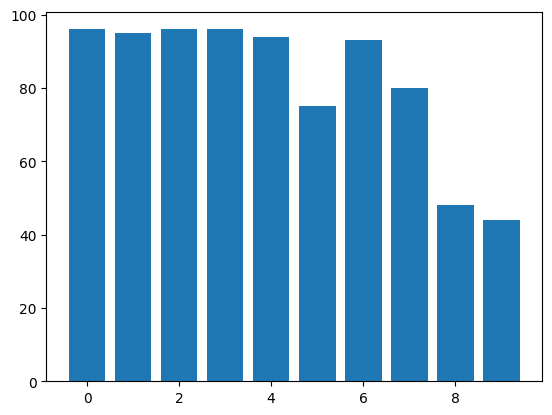

In [52]:
plt.bar("Number of Dependents", "Churn Score", data=df);

# Observation
- Lower the number of dependents higher is the churn score

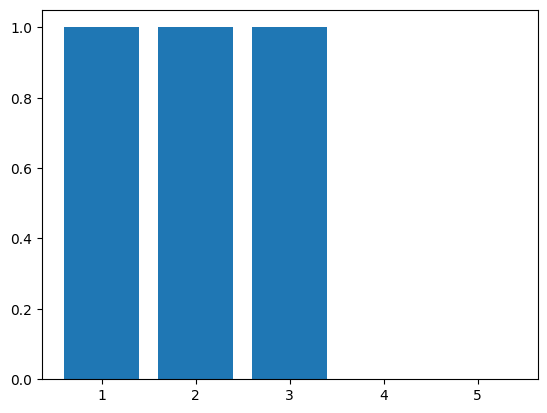

In [53]:
plt.bar("Satisfaction Score", "Churn Value", data=df);

# Observation
- Satisfaction Score < 4 then there is a chances of customer to churn

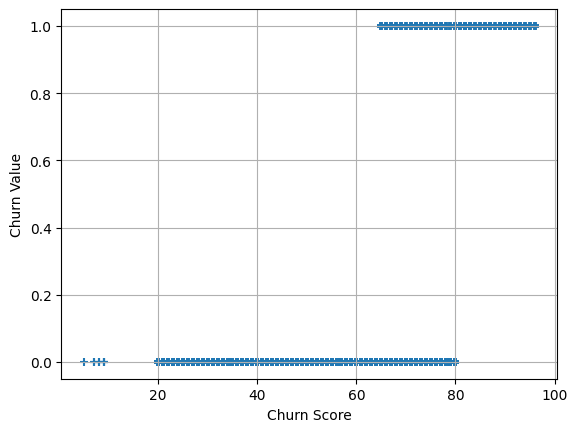

In [54]:
plt.scatter(
    df["Churn Score"],
    df["Churn Value"],
    marker="+",
)
plt.xlabel("Churn Score")
plt.ylabel("Churn Value")
plt.grid(True)

# Observations
- Few churn scores > 60 have higher chances of customer churn

In [55]:
pd.crosstab(df["Satisfaction Score"], df["Customer Status"])

Customer Status,Churned,Joined,Stayed
Satisfaction Score,,,
1,922,0,0
2,518,0,0
3,429,157,2079
4,0,152,1637
5,0,145,1004


# Observation
- Customers  who have given Satisfaction Score `1` and `2` have usually churned.
- Customers  who have given Satisfaction Score as `3` have  churned and maximum have stayed
- Customer with Satisfaction Score 3, have Customer Status as `Stayed` and few as `Churned`
- 4720 Customers stayed while 1869 customers churned

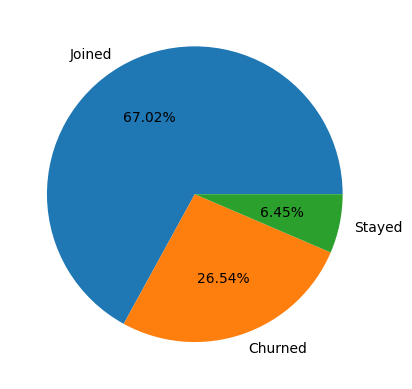

In [56]:
plt.pie(
    df["Customer Status"].value_counts().values,
    labels=set(df["Customer Status"].values),
    autopct="%.2f%%",
);

# Observation
- Customer Status results in 26% customers churned and 67%  stayed

In [57]:
df.Country.value_counts()

Country
United States    7043
Name: count, dtype: int64

In [58]:
df[["State"]].value_counts()

State     
California    7043
Name: count, dtype: int64

In [59]:
populations = (
    df[["Population", "City"]]
    .groupby(["Population", "City"])
    .size()
    .reset_index()[["Population", "City"]]
)
populations.iloc[::-1][:5]

,Population,City
1625,105285,Bell
1624,103214,Norwalk
1623,101215,Los Angeles
1622,98239,Oceanside
1621,97318,Pacoima


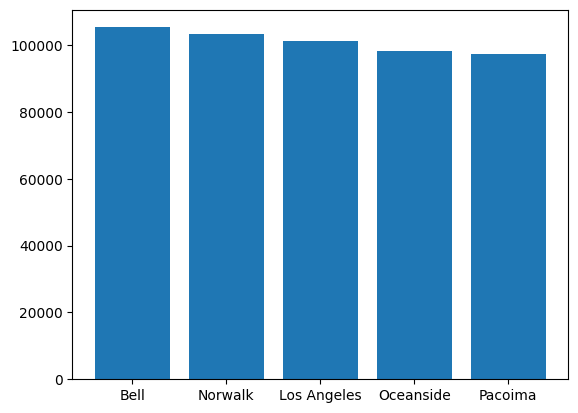

In [60]:
plt.bar(height=populations.Population.iloc[::-1][:5], x=populations.City.iloc[::-1][:5]);

# Obseravtions
- Top 5 cities of United States, California with highest customers are Bell, Norwalk, Los Angeles, Oceanside, Pacoima

In [61]:
pd.crosstab(df.Gender, df.Married)

Married,No,Yes
Gender,,
Female,1800,1688
Male,1841,1714


# Observation
- 1800 Female Customer's marital status is unmarried
- 1841 Male Customer's marital status is unmarried
- 1688 Female Customer's marital status is married
- 1714 Male Customer's marital status is married

In [62]:
pd.crosstab(df.Gender, df.Dependents)

Dependents,No,Yes
Gender,,
Female,2690,798
Male,2726,829


# Observation
- 2690 Female customers and 2726 Male customers are not dependent 
- 789 Female customers and 829 Male customers are dependent

In [63]:
df["Monthly Charge"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Monthly Charge, dtype: float64

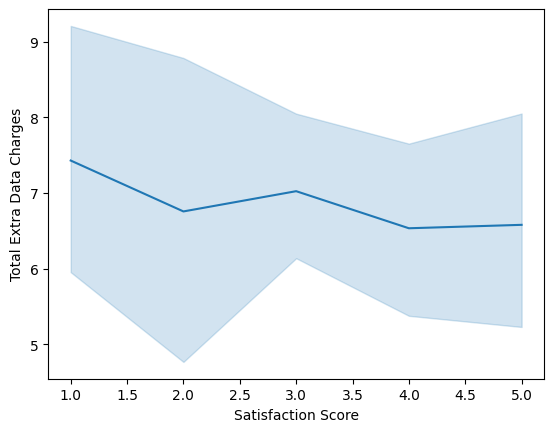

In [64]:
sns.lineplot(y=df["Total Extra Data Charges"], x=df["Satisfaction Score"]);

# Observation
- Extra Data charges has an impact on Satisfaction Score

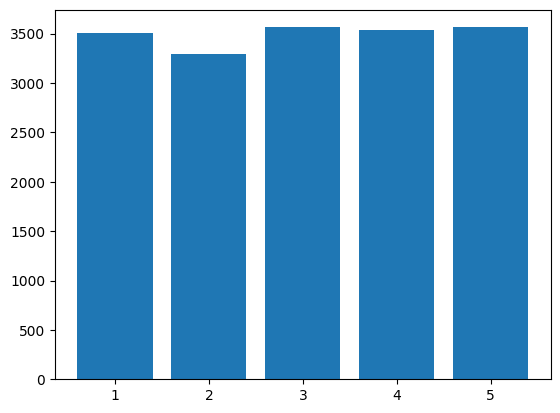

In [65]:
plt.bar(height=df["Total Long Distance Charges"], x=df["Satisfaction Score"]);

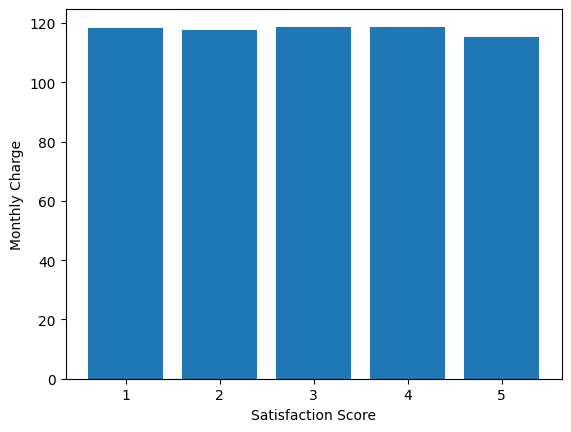

In [66]:
plt.bar(height=df["Monthly Charge"], x=df["Satisfaction Score"])
plt.xlabel("Satisfaction Score")
plt.ylabel("Monthly Charge");

# Observation
-  monthly cost doesn't have much impact on Satisfaction Score
-  Total Long Distance Charges also doesn't have much impact on Satisfaction Score

In [67]:
Refund_amt = (
    df[["City", "Total Refunds", "Satisfaction Score"]]
    .groupby(["Total Refunds", "City", "Satisfaction Score"])
    .size()
    .reset_index()
)
cities_with_refunds = Refund_amt[
    (Refund_amt["Total Refunds"] > 0) & (Refund_amt["Satisfaction Score"] < 3)
]
cities_with_refunds = cities_with_refunds.iloc[:, :-1]
cities_with_refunds

,Total Refunds,City,Satisfaction Score
3139,1.27,Acampo,1
3142,1.48,Dutch Flat,2
3156,2.93,Rancho Cordova,1
3169,4.48,Avalon,1
3173,4.73,Novato,2
...,...,...,...
3642,48.26,Walnut Creek,1
3643,48.54,Cupertino,1
3648,48.95,Rohnert Park,1
3658,49.57,Bieber,2


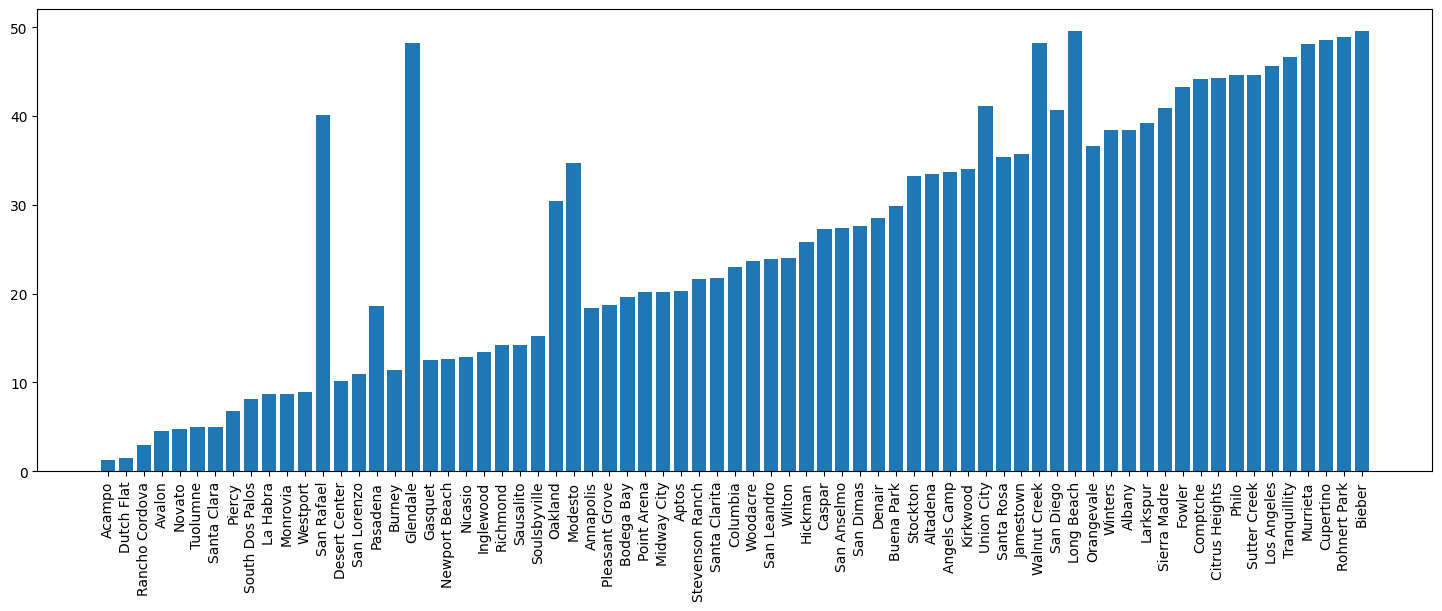

In [68]:
plt.figure(figsize=(18, 6))
plt.bar(x=cities_with_refunds.City, height=cities_with_refunds["Total Refunds"])
plt.xticks(rotation=90);

# Observations
- Cities with Total Refunds are displayed where customers are not satisfied with the service and claimed for refund and have also given Satisfaction Score < 3
- These cities have customers who expect better service and might churn.

In [69]:
Total_revenue = (
    df[["Total Revenue", "City"]]
    .groupby(["Total Revenue", "City"])
    .size()
    .reset_index()
)
Total_revenue = Total_revenue.iloc[:, :-1][::-1]
Total_revenue

,Total Revenue,City
7039,11979.34,Calistoga
7038,11868.34,San Francisco
7037,11795.78,San Francisco
7036,11688.90,Shasta Lake
7035,11634.53,Middletown
...,...,...
4,22.12,Corona
3,22.08,Mira Loma
2,21.61,Smith River
1,21.40,Nevada City


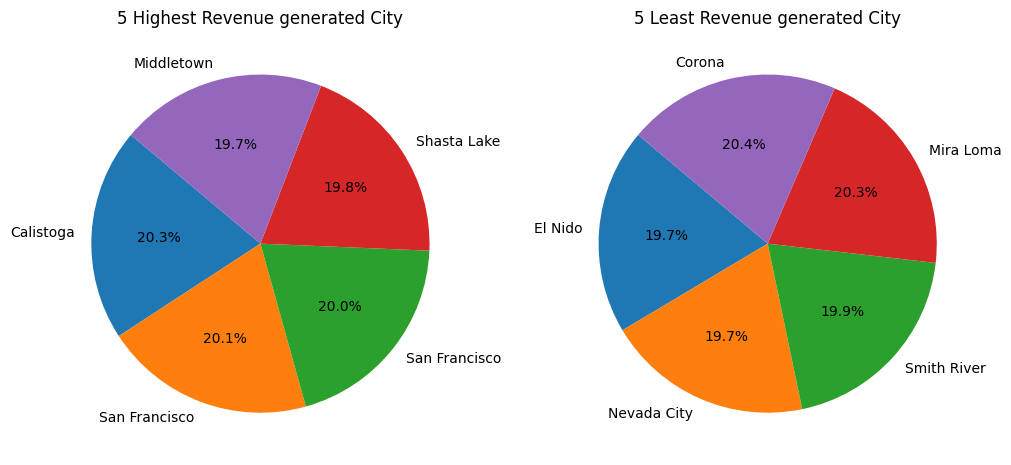

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(
    Total_revenue["Total Revenue"][:5],
    labels=Total_revenue["City"][:5],
    autopct="%1.1f%%",
    startangle=140,
)
ax[0].set_title("5 Highest Revenue generated City")

ax[1].pie(
    Total_revenue["Total Revenue"][::-1][:5],
    labels=Total_revenue["City"][::-1][:5],
    autopct="%1.1f%%",
    startangle=140,
)
ax[1].set_title("5 Least Revenue generated City");

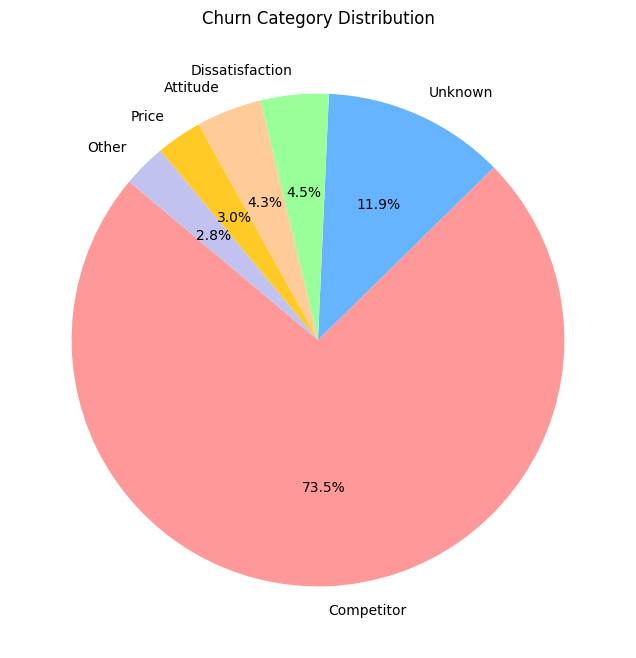

In [71]:
plt.figure(figsize=(8, 8))
plt.pie(
    df["Churn Category"].value_counts().values,
    labels=df["Churn Category"].unique(),
    autopct="%1.1f%%",
    startangle=140,
    colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#ffca26", "#c2c2f0"],
)
plt.title("Churn Category Distribution");

# Observation
 -  The Competitors are the highest reason behind customers churn.
- 11.9% are Unknown which might be personal reasons of the customers.

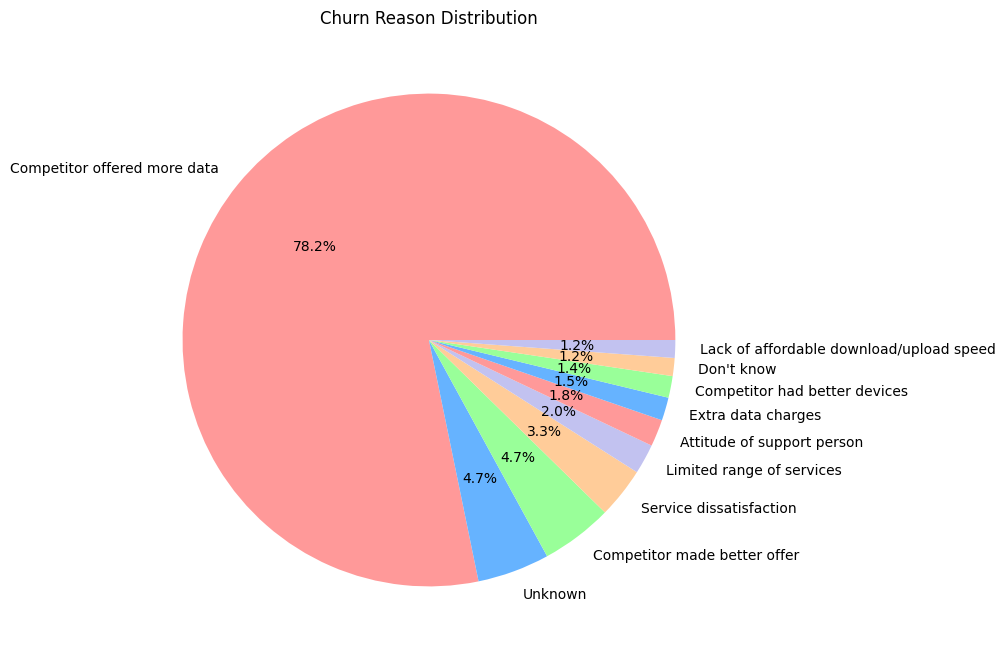

In [72]:
plt.figure(figsize=(8, 8))
plt.pie(
    df["Churn Reason"].value_counts().values[:10],
    labels=df["Churn Reason"].unique()[:10],
    autopct="%1.1f%%",
    colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"],
)
plt.title("Churn Reason Distribution")
plt.show()

# Obseravtion
- Competitors offer more data at same price point which is main cause of customer's churn

# Building ML model

In [1]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
from imblearn import over_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()

In [2]:
df = pd.read_excel("Datasets/DataModel.xlsx")
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,ID,Population
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,21,68701
1,4737-AQCPU,Male,39,No,No,Yes,No,0,United States,California,...,3,Stayed,No,0,42,4658,Unknown,Unknown,21,68701
2,5043-TRZWM,Female,32,No,No,No,No,0,United States,California,...,5,Joined,No,0,34,3503,Unknown,Unknown,21,68701
3,8165-CBKXO,Male,35,No,No,Yes,Yes,3,United States,California,...,3,Stayed,No,0,46,5748,Unknown,Unknown,21,68701
4,9979-RGMZT,Female,20,Yes,No,No,No,0,United States,California,...,3,Stayed,No,0,38,5545,Unknown,Unknown,21,68701


In [3]:
df.Country.value_counts()

Country
United States    7043
Name: count, dtype: int64

In [4]:
df.State.value_counts()

State
California    7043
Name: count, dtype: int64

In [5]:
df.ID.value_counts()

ID
328    43
327    38
373    36
368    34
376    32
       ..
764     2
303     2
357     2
404     2
851     1
Name: count, Length: 1626, dtype: int64

In [6]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Quarter_x',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Quarter_y', 'Satisfaction Score', 'Customer Status',
       'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Category',
       'Churn Reason', 'ID', 'Popula

In [7]:
df2 = df[
    [
        "Gender",
        "Age",
        "Number of Dependents",
        "Married",
        "Monthly Charge",
        "City",
        "Total Extra Data Charges",
        "Unlimited Data",
        "Satisfaction Score",
        "Churn Score",
        "Churn Value",
    ]
]
df2.head()

,Gender,Age,Number of Dependents,Married,Monthly Charge,City,Total Extra Data Charges,Unlimited Data,Satisfaction Score,Churn Score,Churn Value
0,Male,78,0,No,39.65,Los Angeles,20,No,3,91,1
1,Male,39,0,Yes,72.10,Los Angeles,0,Yes,3,42,0
2,Female,32,0,No,75.55,Los Angeles,0,Yes,5,34,0
3,Male,35,3,Yes,56.75,Los Angeles,0,Yes,3,46,0
4,Female,20,0,No,94.05,Los Angeles,0,Yes,3,38,0


In [8]:
cat_columns = df[["Gender", "Married", "City", "Unlimited Data"]]
cat_columns.head()

,Gender,Married,City,Unlimited Data
0,Male,No,Los Angeles,No
1,Male,Yes,Los Angeles,Yes
2,Female,No,Los Angeles,Yes
3,Male,Yes,Los Angeles,Yes
4,Female,No,Los Angeles,Yes


In [9]:
df2.loc[:, "Gender"] = encoder.fit_transform(df.Gender)
df2.loc[:, "Unlimited Data"] = encoder.fit_transform(df["Unlimited Data"])
df2.loc[:, "Married"] = encoder.fit_transform(df.Married)
df2.loc[:, "City"] = encoder.fit_transform(df2["City"])
df2.head()

,Gender,Age,Number of Dependents,Married,Monthly Charge,City,Total Extra Data Charges,Unlimited Data,Satisfaction Score,Churn Score,Churn Value
0,1,78,0,0,39.65,554,20,0,3,91,1
1,1,39,0,1,72.10,554,0,1,3,42,0
2,0,32,0,0,75.55,554,0,1,5,34,0
3,1,35,3,1,56.75,554,0,1,3,46,0
4,0,20,0,0,94.05,554,0,1,3,38,0


### Checking the correlation  using pearson's correlation technique

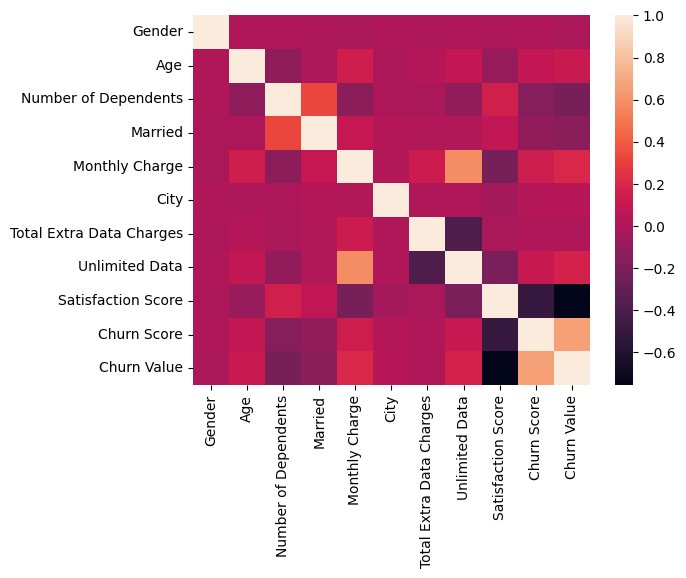

In [10]:
sns.heatmap(df2.corr(method="pearson"));

### Positive correlation
Number of Dependent,
Monthly Charges,
Total Extra Data Charges

### Negative correlation
Satisfaction Score,
Churn Score,
Age

### Observations

* Number of Dependents: Customers with more dependents are more likely to churn because they may have more options for choosing a different service provider. For example, if a customer has multiple family members on their account, they may be more likely to switch to a different service provider if they can get a better deal on a family lan.

* Monthly Charge: Customers with higher monthly charges are more likely to churn because they may be more price-sensitive. These customers may be more likely to switch to a different service provider if they can find a better deal on a comparable sevice.

* Total Extra Data Charges: Customers with higher total extra data charges are more likely to churn because they may be more frustrated with their current service provider. These customers may feel like they are being overcharged for data usage, and they may be more likely to switch to a different service provider that offers a better data.
 
* Satisfaction Score: Customers with higher satisfaction scores are less likely to churn because they are more happy with their current service provider. These customers are less likely to switch to a different service provider unless they have a very compelling reason.
  
* Churn Score: Customers with lower churn scores are less likely to churn because they are less likely to be at risk of churning. Churn scores are typically calculated based on a variety of factors, such as customer usage patterns, payment history, and customer support inteactions.

* Age: Younger customers are less likely to churn because they may be more willing to try new things. These customers may also be less likely to be tied down to a specific service provider, as they may not have been using their current service for as long as older customers.

In [11]:
X = df2.drop("Churn Value", axis=1)
y = df2["Churn Value"]

In [12]:
y.value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

### Dealing with Class imbalance using SMOTE (By Oversampling)

In [13]:
oversample = over_sampling.SMOTE()
X, y = oversample.fit_resample(X, y)

In [14]:
y.value_counts()

Churn Value
1    5174
0    5174
Name: count, dtype: int64

### Standardizing the values to normal scale

In [15]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X1, y, shuffle=True, stratify=y, random_state=21
)
X_train.shape, X_test.shape

((7761, 10), (2587, 10))

In [17]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
}

model = RandomForestClassifier(
    random_state=42, max_depth=None, min_samples_split=5, n_estimators=100
)

# model = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")

model.fit(X_train, y_train)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1293
           1       0.99      0.98      0.98      1294

    accuracy                           0.98      2587
   macro avg       0.98      0.98      0.98      2587
weighted avg       0.98      0.98      0.98      2587



In [18]:
model.best_params_

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

In [21]:
confusion_matrix(y_test, y_pred)

array([[1277,   16],
       [  25, 1269]], dtype=int64)

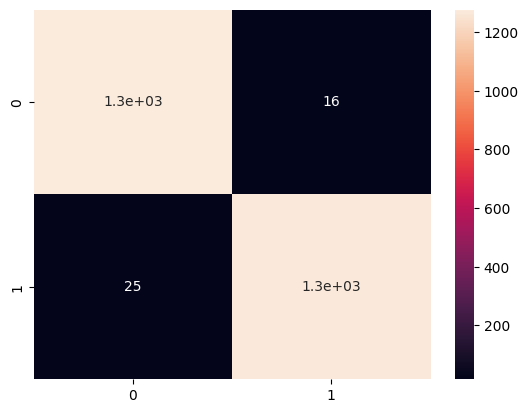

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

* True Positives (TP) = 1277: This means there were 1277 cases where the model correctly predicted that the customer would churn.* 
True Negatives (TN) = 1269: This means there were 1269 cases where the model correctly predicted that the customer would not churn.* 
False Positives (FP) = 16: This means there were 16 cases where the model predicted churn, but the customer did not actually churn (Type I error)* .
False Negatives (FN) = 25: This means there were 25 cases where the model predicted non-churn, but the customer actually churned (Type II erro).


# Model Persistance

In [20]:
pickle.dump(model, open("Model.pkl", "wb"))